## Lineare Regression mit Tensorflow

In [1]:
#
# Einfache lineare Regression mit TensorFlow 2.x
#
import os
import random
import matplotlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-07-03 16:07:04.408268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(42) # Damit wir immer die gleichen Zufallswerte bekommen
my_weight = 4 # Diese Variable muss später vom Modell gelernt werden.

In [3]:
# Ein Array von 100 Werten wird generiert.
input = np.arange(0, 10, 0.1,dtype="float32")
noise = np.random.uniform(-3,3,size=input.shape)

In [4]:
# Damit die Ausgabe nicht direkt linear ist, werden Zufallswerte hinzugefügt.
output = my_weight * input + noise
output = output.astype("float32")

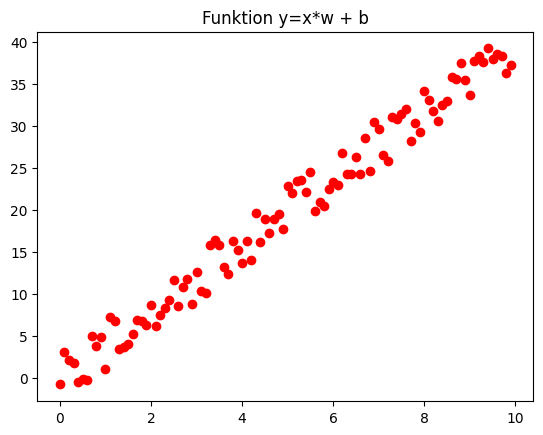

In [5]:
plt.title('Funktion y=x*w + b')
plt.scatter(input, output, c="red")
plt.show()

In [6]:
class MyLinearRegressionModel():
    def __init__(self):
        self.W = tf.Variable(np.random.uniform(),dtype="float32",trainable=True )
        self.b = tf.Variable(np.random.uniform(),dtype="float32",trainable=True )

    def __call__(self, x):
        return tf.add(tf.multiply(x,self.W), self.b)

In [7]:
model = MyLinearRegressionModel()

In [8]:
def loss_function(pred, y):
    return tf.reduce_mean(tf.square(pred - y))

In [9]:
learning_rate=0.03
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [10]:
 # 2. Version mit tape.gradient() und optimizer
def train_with_optimizers(model,x,y):
    with tf.GradientTape() as tape:
        current_loss = loss_function(model(x), y)  
    gradients = tape.gradient(current_loss,[model.W,model.b])
    optimizer.apply_gradients(zip(gradients , [model.W,model.b]))
    return current_loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


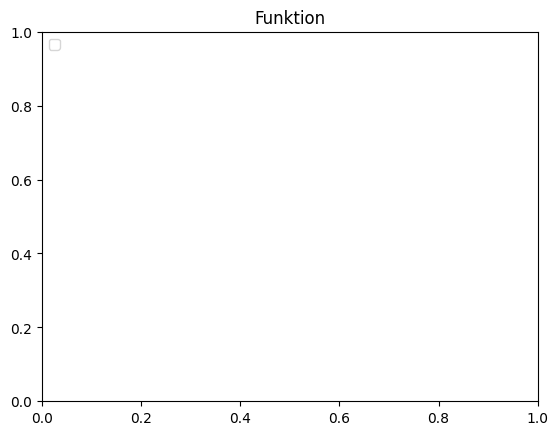

In [11]:
plt.ion()
plt.title('Funktion')
plt.legend(loc='upper left')

In [12]:
 # Update des plt.scatter() mit den neu berechneteten Werten
def redraw_curve(input,output,predicted_output,epoch,loss):
    plt.clf()
    plt.title("Epoch: " +str(epoch) +'\nLoss: ' + str(loss.numpy())+'\nFunktion y = x*w + b  mit w=' + str(model.W.numpy()) + ' und b=' + str(model.b.numpy()))
    plt.scatter(input,output,c="red",s=4,label="Original Werte")
    plt.scatter(input,predicted_output,s=5, c="g", label="Vorhersage")
    plt.show()  
    plt.draw()
    plt.pause(0.0001)

Current loss: 489.7436828613281


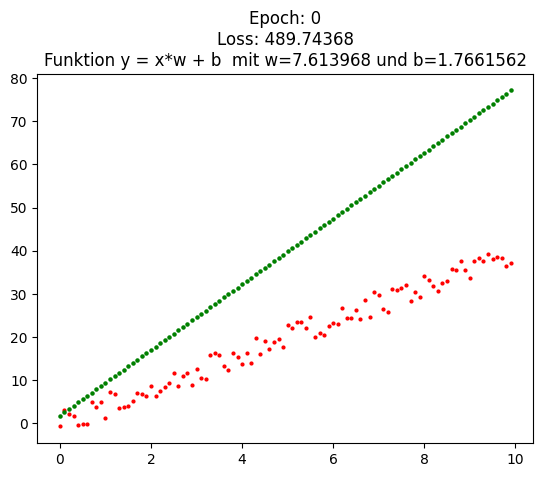

<Figure size 640x480 with 0 Axes>

Current loss: 504.6309814453125


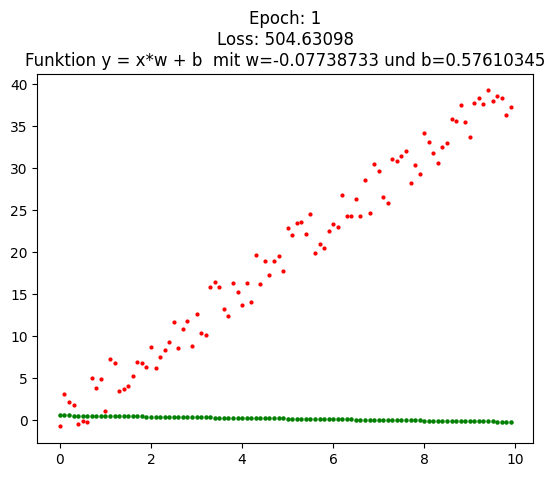

<Figure size 640x480 with 0 Axes>

Current loss: 519.9756469726562


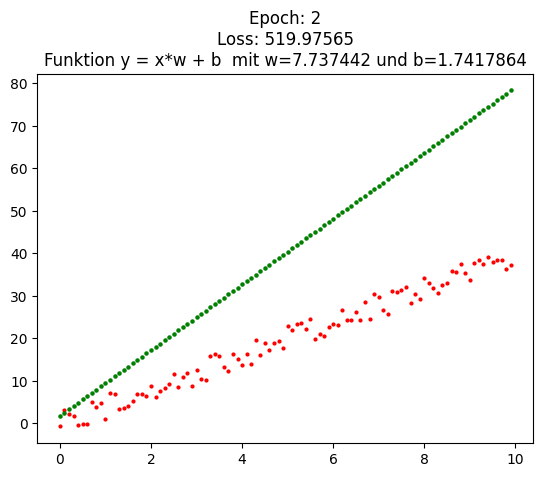

<Figure size 640x480 with 0 Axes>

Current loss: 535.791748046875


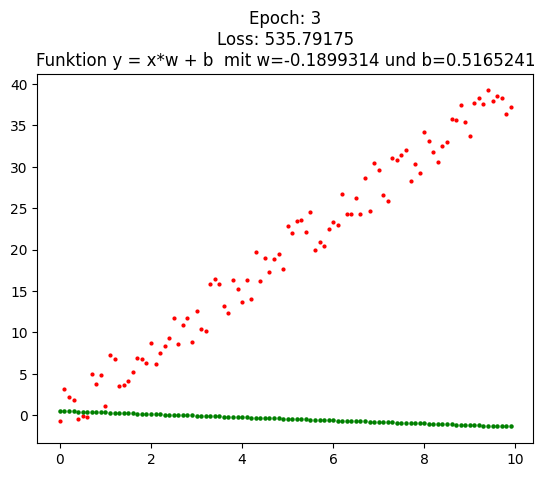

<Figure size 640x480 with 0 Axes>

Current loss: 552.0935668945312


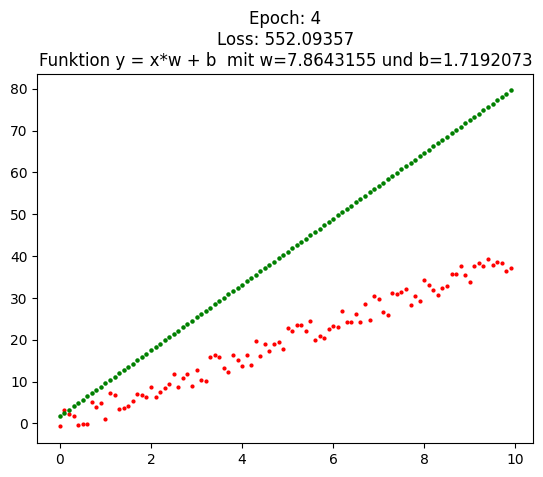

<Figure size 640x480 with 0 Axes>

Current loss: 568.8961181640625


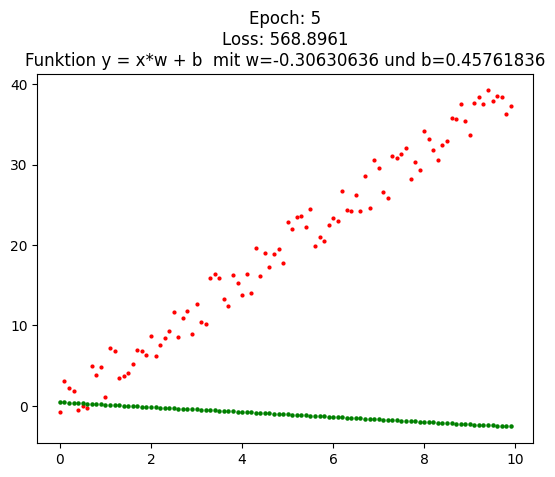

<Figure size 640x480 with 0 Axes>

Current loss: 586.2149047851562


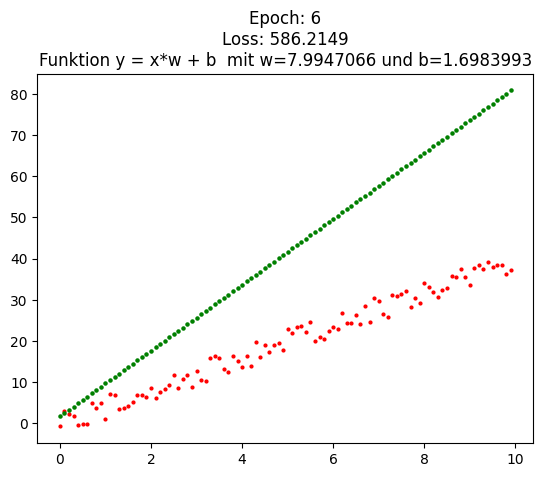

<Figure size 640x480 with 0 Axes>

Current loss: 604.0654907226562


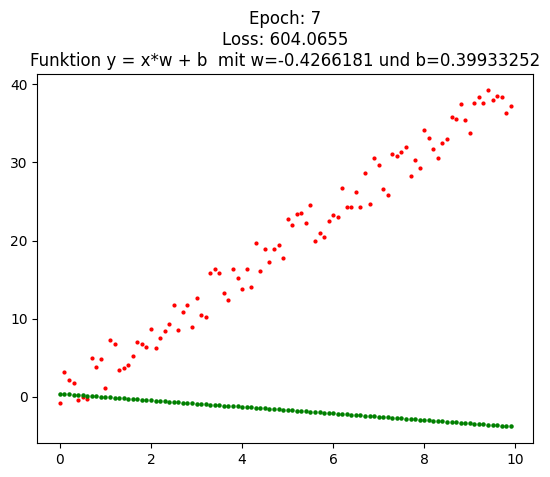

<Figure size 640x480 with 0 Axes>

Current loss: 622.4639892578125


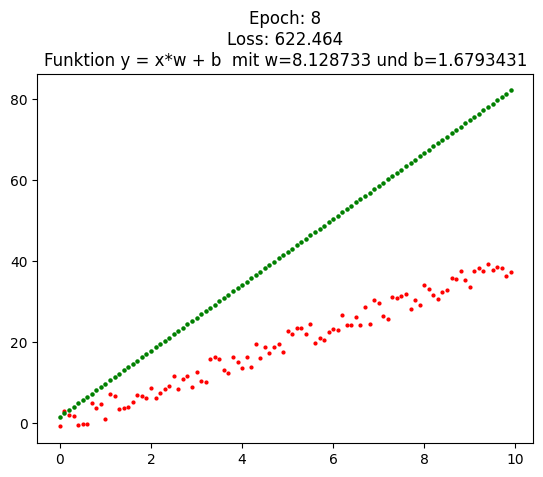

<Figure size 640x480 with 0 Axes>

Current loss: 641.4277954101562


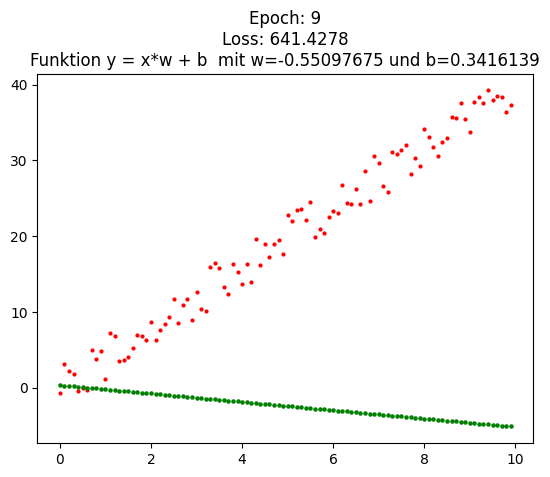

<Figure size 640x480 with 0 Axes>

Current loss: 660.9732055664062


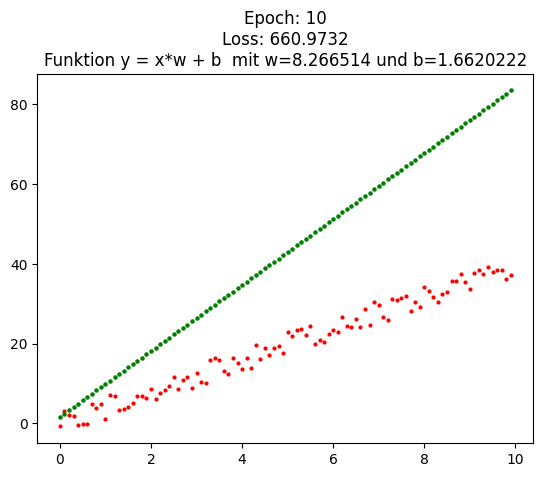

<Figure size 640x480 with 0 Axes>

Current loss: 681.1187744140625


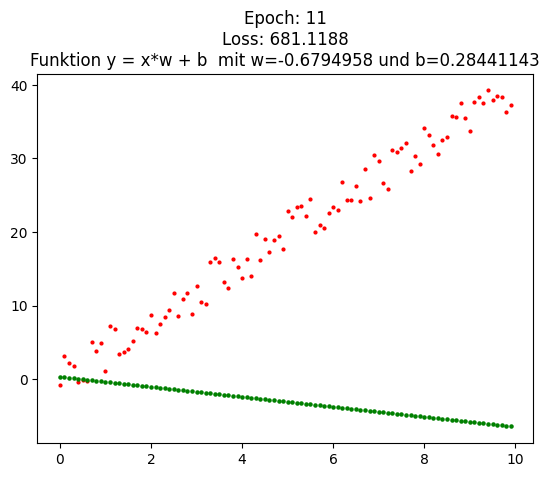

<Figure size 640x480 with 0 Axes>

Current loss: 701.8831787109375


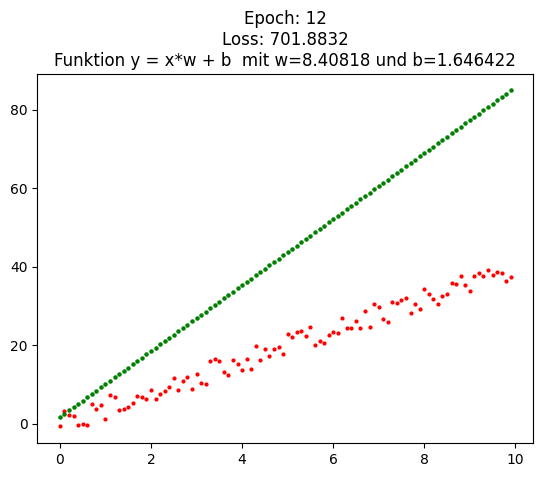

<Figure size 640x480 with 0 Axes>

Current loss: 723.28466796875


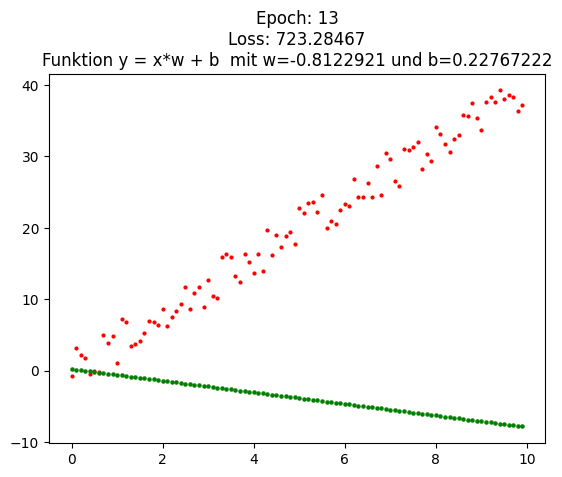

<Figure size 640x480 with 0 Axes>

Current loss: 745.3429565429688


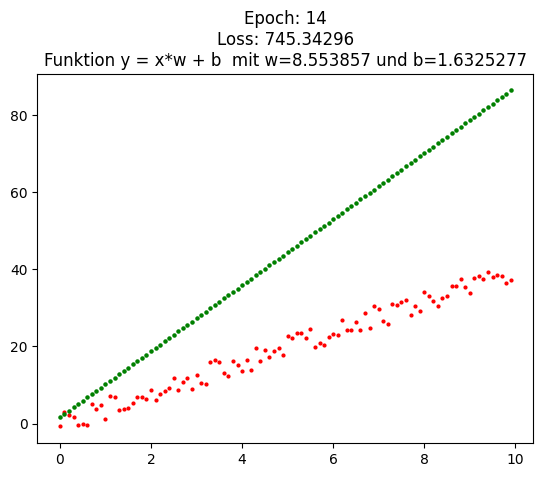

<Figure size 640x480 with 0 Axes>

Current loss: 768.078125


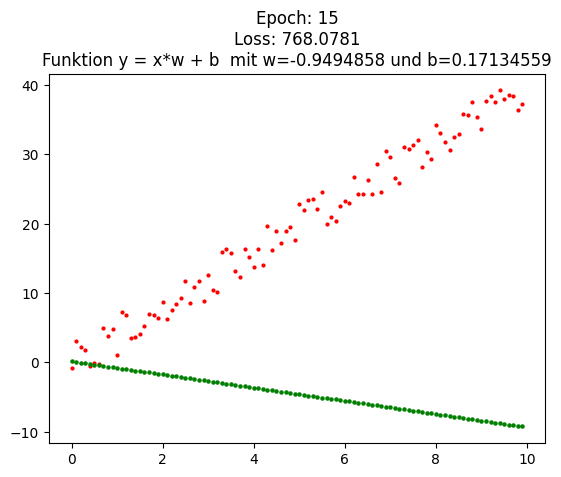

<Figure size 640x480 with 0 Axes>

Current loss: 791.5109252929688


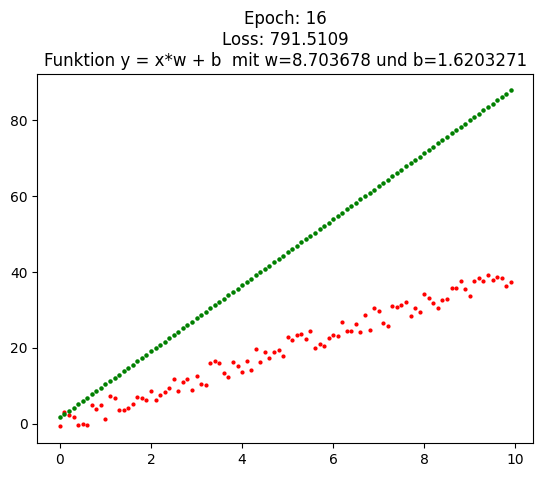

<Figure size 640x480 with 0 Axes>

Current loss: 815.6631469726562


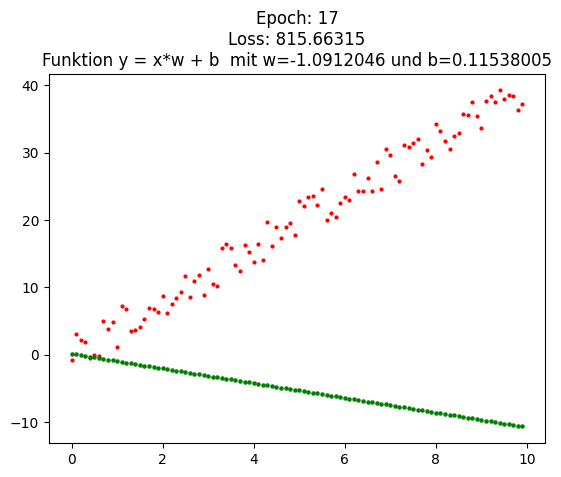

<Figure size 640x480 with 0 Axes>

Current loss: 840.5562744140625


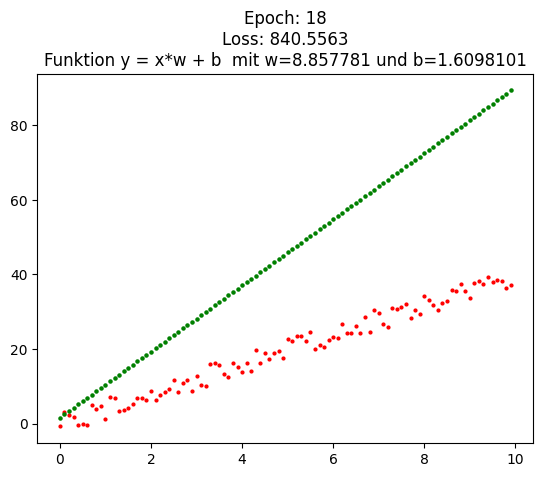

<Figure size 640x480 with 0 Axes>

Current loss: 866.21337890625


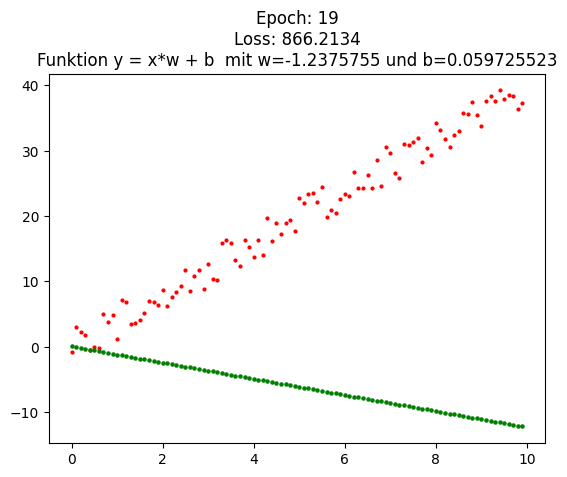

<Figure size 640x480 with 0 Axes>

Current loss: 892.6573486328125


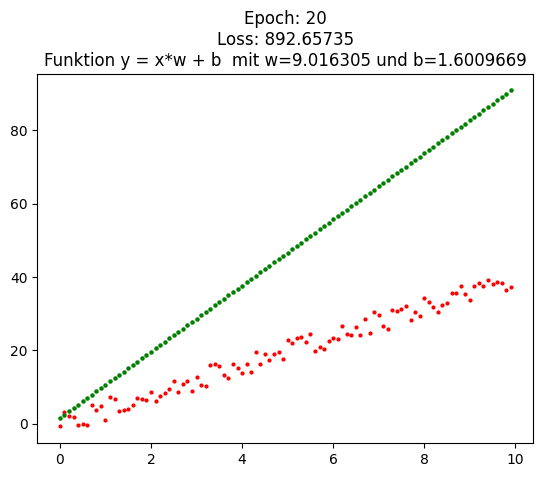

<Figure size 640x480 with 0 Axes>

Current loss: 919.9129028320312


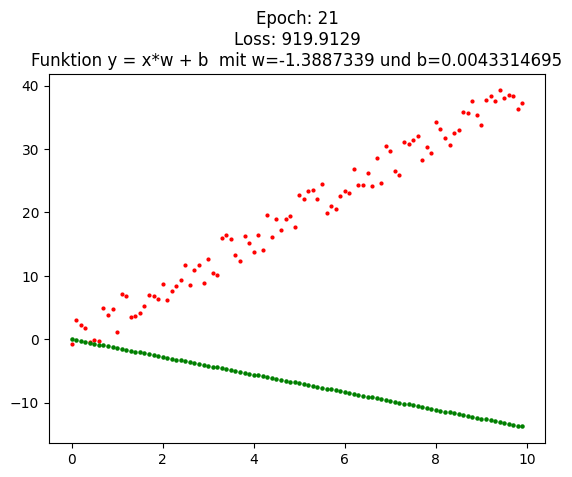

<Figure size 640x480 with 0 Axes>

Current loss: 948.0046997070312


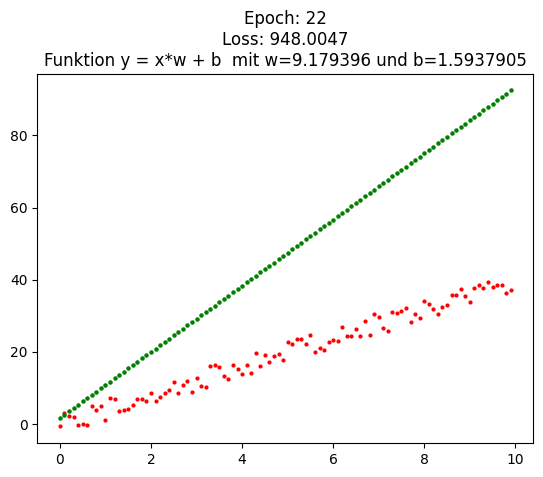

<Figure size 640x480 with 0 Axes>

Current loss: 976.9581909179688


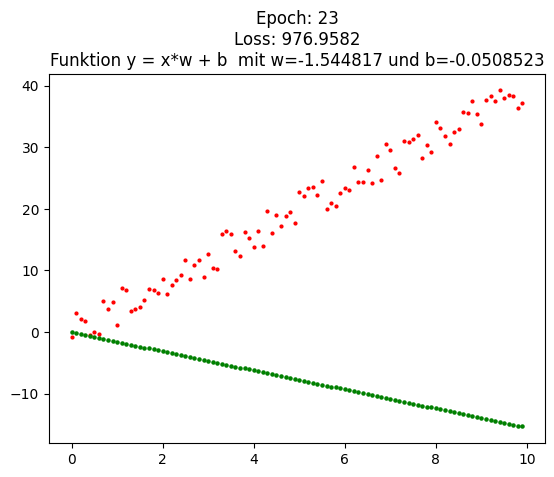

<Figure size 640x480 with 0 Axes>

Current loss: 1006.80029296875


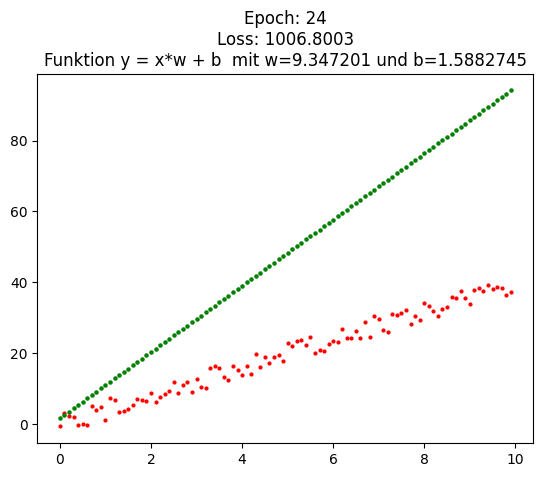

<Figure size 640x480 with 0 Axes>

In [13]:
# Trainingsschleife
for epoch in range(0,25):
    # Version 1:
    loss = train_with_optimizers(model, input,output)
    # Version 2:
    # loss = train(model,input,output)
    print("Current loss: {}".format(loss.numpy()))
    predicted_output = model(input) 
    redraw_curve(input,output,predicted_output,epoch,loss)

In [14]:
plt.show(block=True) 
print("Vorhersage Wert für w: " + str(model.W.numpy()))

Vorhersage Wert für w: 9.347201
